In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy.random as np
import sys
import matplotlib

%matplotlib inline

In [6]:
np.seed(111)

def CreateDataSet(Number=1):
    Output = []
    
    for i in range(Number):
        rng = pd.date_range(start='1/1/2009', end = '12/31/2012', freq = 'W-MON')
        #create weekly mondays data range
        
        data= np.randint(low=25, high = 1000, size = len(rng))
        
        status = [1,2,3]
        
        random_status = [status[np.randint(low = 0, high = len(status))] for i in range(len(rng))]
        
        states = ['GA','FL','fl','NY','NJ','TX']
        
        random_states = [states[np.randint(low = 0, high = len(states))] for i in range(len(rng))]
        
        Output.extend(zip(random_states, random_status, data, rng))
        
    return Output

In [7]:
dataset = CreateDataSet(4)
df = pd.DataFrame(data = dataset, columns = ['State','Status','CustomerCount','Status Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 4 columns):
State            836 non-null object
Status           836 non-null int64
CustomerCount    836 non-null int64
Status Date      836 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 26.2+ KB


In [8]:
df.head()

,State,Status,CustomerCount,Status Date
0,GA,1,877,2009-01-05
1,FL,1,901,2009-01-12
2,fl,3,749,2009-01-19
3,FL,3,111,2009-01-26
4,GA,1,300,2009-02-02


In [9]:
#save results to excel

df.to_excel('Lesson3.xlsx', index = False)
print('Done')

Done


In [11]:
Location = r'file:///C:\Users\yangliu\Coding\DS-SF-42\classes\01\notebooks\python-iteration_control_functions-lesson\Lesson3.xlsx'

df = pd.read_excel(Location, 0, index_col = 'Status Date')
df.dtypes

State            object
Status            int64
CustomerCount     int64
dtype: object

In [12]:
df.head()

,State,Status,CustomerCount
Status Date,,,
2009-01-05,GA,1,877
2009-01-12,FL,1,901
2009-01-19,fl,3,749
2009-01-26,FL,3,111
2009-02-02,GA,1,300


In [14]:
df.index

DatetimeIndex(['2009-01-05', '2009-01-12', '2009-01-19', '2009-01-26',
               '2009-02-02', '2009-02-09', '2009-02-16', '2009-02-23',
               '2009-03-02', '2009-03-09',
               ...
               '2012-10-29', '2012-11-05', '2012-11-12', '2012-11-19',
               '2012-11-26', '2012-12-03', '2012-12-10', '2012-12-17',
               '2012-12-24', '2012-12-31'],
              dtype='datetime64[ns]', name=u'Status Date', length=836, freq=None)

In [15]:
df['State'].unique()

array([u'GA', u'FL', u'fl', u'TX', u'NY', u'NJ'], dtype=object)

In [16]:
#clean data by converting all states to upper case

df['State'] = df.State.apply(lambda x: x.upper())

In [17]:
df['State'].unique()

array([u'GA', u'FL', u'TX', u'NY', u'NJ'], dtype=object)

In [18]:
#only grab where status == 1

mask = df['Status'] == 1
df = df[mask]

In [19]:
df.head()

,State,Status,CustomerCount
Status Date,,,
2009-01-05,GA,1,877
2009-01-12,FL,1,901
2009-02-02,GA,1,300
2009-03-09,NY,1,992
2009-04-06,FL,1,291


In [20]:
#convert all states that are NJ to NY

mask = df.State == 'NJ'
df['State'][mask] = 'NY'

In [21]:
df['State'].unique()

array([u'GA', u'FL', u'NY', u'TX'], dtype=object)

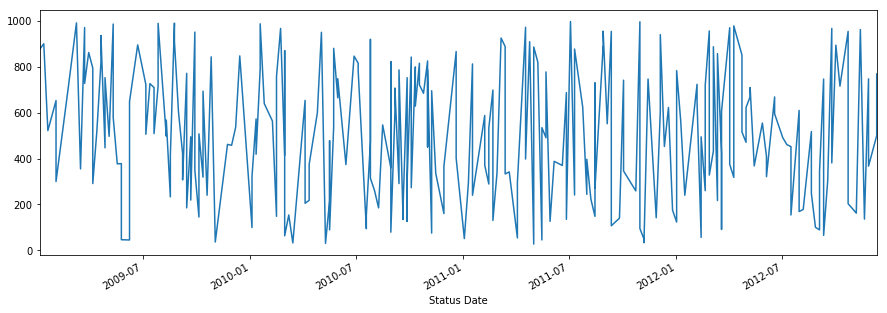

In [22]:
df['CustomerCount'].plot(figsize = (15,5));

In [23]:
sortdf = df[df['State'] == 'NY'].sort_index(axis = 0)
sortdf.head(10)

,State,Status,CustomerCount
Status Date,,,
2009-01-19,NY,1,522
2009-02-23,NY,1,710
2009-03-09,NY,1,992
2009-03-16,NY,1,355
2009-03-23,NY,1,728
2009-03-30,NY,1,863
2009-04-13,NY,1,520
2009-04-20,NY,1,820
2009-04-20,NY,1,937


In [25]:
#we see that there are multiple customer counts for the same state on the same day, so we need to combine the data
#reset_index() function allows you to sort by 2 columns at the same time

Daily = df.reset_index().groupby(['State','Status Date']).sum()
Daily.head()

Status  CustomerCount
State Status Date                       
FL    2009-01-12        1            901
      2009-02-02        1            653
      2009-03-23        1            752
      2009-04-06        2           1086
      2009-06-08        1            649

In [26]:
#delete the status column because everything should be equal to 1 and not necessary

del Daily['Status']
Daily.head()

CustomerCount
State Status Date               
FL    2009-01-12             901
      2009-02-02             653
      2009-03-23             752
      2009-04-06            1086
      2009-06-08             649

In [27]:
#what is the index of the data frame?

Daily.index

MultiIndex(levels=[[u'FL', u'GA', u'NY', u'TX'], [2009-01-05 00:00:00, 2009-01-12 00:00:00, 2009-01-19 00:00:00, 2009-02-02 00:00:00, 2009-02-23 00:00:00, 2009-03-09 00:00:00, 2009-03-16 00:00:00, 2009-03-23 00:00:00, 2009-03-30 00:00:00, 2009-04-06 00:00:00, 2009-04-13 00:00:00, 2009-04-20 00:00:00, 2009-04-27 00:00:00, 2009-05-04 00:00:00, 2009-05-11 00:00:00, 2009-05-18 00:00:00, 2009-05-25 00:00:00, 2009-06-08 00:00:00, 2009-06-22 00:00:00, 2009-07-06 00:00:00, 2009-07-13 00:00:00, 2009-07-20 00:00:00, 2009-07-27 00:00:00, 2009-08-10 00:00:00, 2009-08-17 00:00:00, 2009-08-24 00:00:00, 2009-08-31 00:00:00, 2009-09-07 00:00:00, 2009-09-14 00:00:00, 2009-09-21 00:00:00, 2009-09-28 00:00:00, 2009-10-05 00:00:00, 2009-10-12 00:00:00, 2009-10-19 00:00:00, 2009-10-26 00:00:00, 2009-11-02 00:00:00, 2009-11-23 00:00:00, 2009-11-30 00:00:00, 2009-12-07 00:00:00, 2009-12-14 00:00:00, 2010-01-04 00:00:00, 2010-01-11 00:00:00, 2010-01-18 00:00:00, 2010-01-25 00:00:00, 2010-02-08 00:00:00, 2010-

In [28]:
#select the state index

Daily.index.levels[0]

Index([u'FL', u'GA', u'NY', u'TX'], dtype='object', name=u'State')

# select the status date index

Daily.index.levels[1]

In [29]:
#select the status date index

Daily.index.levels[1]

DatetimeIndex(['2009-01-05', '2009-01-12', '2009-01-19', '2009-02-02',
               '2009-02-23', '2009-03-09', '2009-03-16', '2009-03-23',
               '2009-03-30', '2009-04-06',
               ...
               '2012-09-24', '2012-10-01', '2012-10-08', '2012-10-22',
               '2012-10-29', '2012-11-05', '2012-11-12', '2012-11-19',
               '2012-11-26', '2012-12-10'],
              dtype='datetime64[ns]', name=u'Status Date', length=161, freq=None)

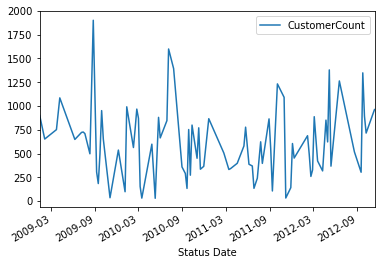

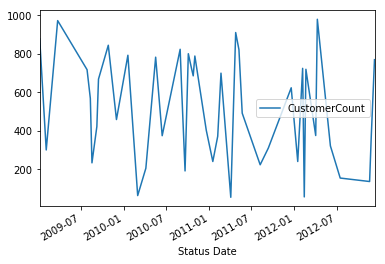

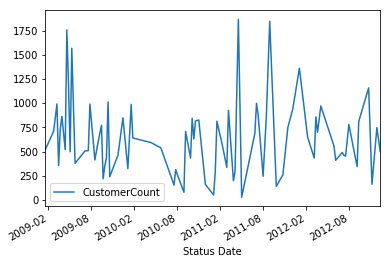

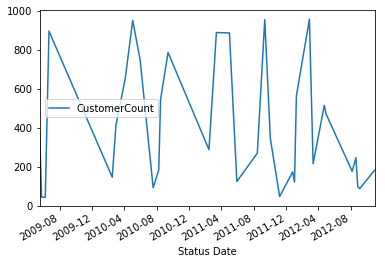

In [30]:
#plot the data by state

Daily.loc['FL'].plot()
Daily.loc['GA'].plot()
Daily.loc['NY'].plot()
Daily.loc['TX'].plot()

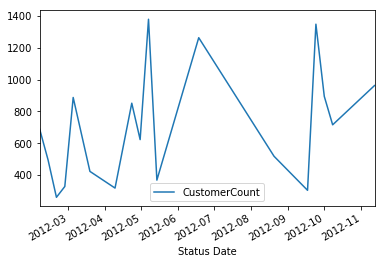

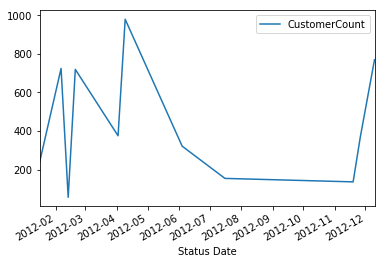

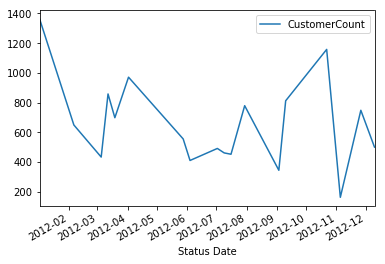

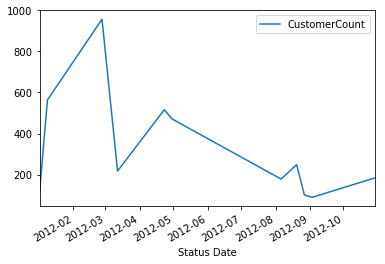

In [31]:
#can also plot the data by multiple variables, e.g. by state for 2012

Daily.loc['FL']['2012'].plot()
Daily.loc['GA']['2012'].plot()
Daily.loc['NY']['2012'].plot()
Daily.loc['TX']['2012'].plot()

In [32]:
#StateYearMonth - group by state, year of status date and month of status date
#Daily['Outlier'] - Boolean that let's you know if a customer count data is within an acceptable range

#Calculate Outliers

StateYearMonth = Daily.groupby([Daily.index.get_level_values(0),Daily.index.get_level_values(1).year, Daily.index.get_level_values(1).month])

In [37]:
Daily['Lower'] = StateYearMonth['CustomerCount'].transform(lambda x : x.quantile(q=.25) - (1.5*x.quantile(q=0.75) - x.quantile(q=0.25)))

Daily['Upper'] = StateYearMonth['CustomerCount'].transform( lambda x: x.quantile(q=.75) + (1.5*x.quantile(q=.75)-x.quantile(q=.25)) )
Daily['Outlier'] = (Daily['CustomerCount'] < Daily['Lower']) | (Daily['CustomerCount'] > Daily['Upper']) 

#remove Outliers
Daily = Daily[Daily['Outlier'] == False]


In [38]:
Daily.head()

#outlier column says false because those data points are not considered outliers

CustomerCount  Lower   Upper  Outlier
State Status Date                                       
FL    2009-01-12             901  450.5  1351.5    False
      2009-02-02             653  326.5   979.5    False
      2009-03-23             752  376.0  1128.0    False
      2009-04-06            1086  543.0  1629.0    False
      2009-06-08             649  324.5   973.5    False

In [40]:
#combine the data for all states
#max function smoothes out the charts

#get the max customer count by date
ALL = pd.DataFrame(Daily['CustomerCount'].groupby(Daily.index.get_level_values(1)).sum())
ALL.columns = ['CustomerCount'] #renames column

#group by  year and month
YearMonth = ALL.groupby([lambda x: x.year, lambda x: x.month])

#What is the max customer count by year and month
ALL['Max'] = YearMonth['CustomerCount'].transform(lambda x: x.max())
ALL.head()

,CustomerCount,Max
Status Date,,
2009-01-05,877,901
2009-01-12,901,901
2009-01-19,522,901
2009-02-02,953,953
2009-02-23,710,953


In [41]:
#set annual goals and determine whether these annual goals are met

#create the goals data frame (BHAG = big hairy annual goal)
data = [1000,2000,3000]
idx = pd.date_range(start = '12/31/2011', end = '12/31/2013', freq = 'A')
BHAG = pd.DataFrame(data, index = idx, columns = ['BHAG'])
BHAG

,BHAG
2011-12-31,1000
2012-12-31,2000
2013-12-31,3000


In [42]:
#axis = 0 --> append row wise, axis = 1 --> append column wise

combined = pd.concat([ALL, BHAG], axis = 0)
combined = combined.sort_index(axis = 0)
combined.tail()

,BHAG,CustomerCount,Max
2012-11-19,NaN,136.0,1115.0
2012-11-26,NaN,1115.0,1115.0
2012-12-10,NaN,1269.0,1269.0
2012-12-31,2000.0,NaN,NaN
2013-12-31,3000.0,NaN,NaN


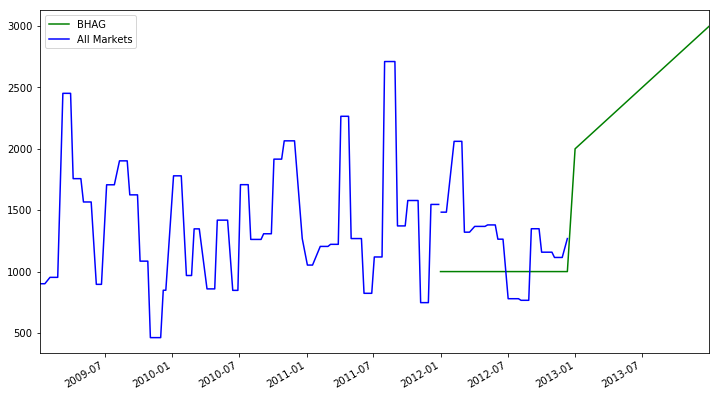

In [43]:
fig, axes = plt.subplots(figsize=(12, 7))

combined['BHAG'].fillna(method='pad').plot(color='green', label='BHAG')
combined['Max'].plot(color='blue', label='All Markets')
plt.legend(loc='best');
